# A practical Guide to Feature Engineering in Python

Feature engineering is one of the most important skills needed in data science and machine learning. It has a major influence on the performance of machine learning models and even the quality of insights derived during exploratory data analysis (EDA).

In this article, we’re going to learn some important techniques and tools that will help you properly extract, prepare, and engineer features from your dataset.

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Common function

In [2]:
def Predictive_Model(X_train, y_train, X_test, y_test):
       
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.Logit(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LogisticRegression(C=1e8)
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [3]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [4]:
def ModelEvaluation(X_train, y_train, X_test, y_test):
       
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    #models.append(('SVC', SVC(kernel="linear")))
    #models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [21]:
def Model_Selection(X_train, y_train, X_test, y_test):
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    #models.append(('SVC', SVC(kernel="linear")))
   # models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'accuracy'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [5]:
from sklearn.manifold import TSNE



def tsne_plot(df, cont_vars):
       
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(X_train)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y_train == 0), 0], X_t[np.where(y_train == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y_train == 1), 0], X_t[np.where(y_train == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();
    

# 3. Loading the raw data

In [157]:
df = pd.read_csv('CarSale.csv')
org_df = df.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 4. Data Exploration

## 4.1. Descriptive Statistics

In [158]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173,NaN,NaN,NaN,19418.7,25584.2,600,6999,11500,21700,300000
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345,NaN,NaN,NaN,161.237,105.706,0,86,155,230,980
EngineV,4195,NaN,NaN,NaN,2.79073,5.06644,0.6,1.8,2.2,3,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345,NaN,NaN,NaN,2006.55,6.7191,1969,2003,2008,2012,2016
Model,4345,312,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.2. Investigating missing values

In [159]:
print('Original shape: ', df.shape)
df = df.dropna(axis=0)
print('After removing data: ', df.shape)

df = df.reset_index(drop=True)
cleaned_df = df.copy()

Original shape:  (4345, 9)
After removing data:  (4025, 9)


## 4.4. Investigate target var

### Define Target

In [160]:
df['Class'] = 0
df.loc[df.Price > 15000, 'Class'] = 1
df = df.drop(['Price'],axis=1)

df[df.Class == 0].shape, df[df.Class == 1].shape

((2535, 9), (1490, 9))

## 4.3. Categorize vars

In [169]:
## target
target = ['Class']
print("\nTarget var: ", target)

text_vars = []

mixed_vars = []

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\n========================================================================")
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

one_level = [var for var in cat_vars if len(df[var].unique()) == 1 if var not in mixed_vars+text_vars]
print("\nOne level vars: ", one_level)
print('There are {} One level variables'.format(len(one_level)))

low_levels = [var for var in cat_vars if len(df[var].unique()) <= 30 if var not in mixed_vars+text_vars]
print("\nLow cardinality vars: ", low_levels)
print('There are {} Low cardinality variables'.format(len(low_levels)))

high_levels = [var for var in cat_vars if len(df[var].unique()) > 30 if var not in mixed_vars+text_vars]
print("\nHigh cardinality vars: ", high_levels)
print('There are {} High cardinality variables'.format(len(high_levels)))

print("\nMixed type vars: ", mixed_vars)
print('There are {} Mixed type  variables'.format(len(mixed_vars)))

datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\n========================================================================")
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

print("\n========================================================================")
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target + datetime_vars + text_vars]
print("\n========================================================================")
print("\nNumerical vars: ", num_vars)
print('\nThere are {} Numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} Discrete variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} Continous variables'.format(len(cont_vars)))


Target var:  ['Class']


Categorical vars:  ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
There are 5 categorical variables

One level vars:  []
There are 0 One level variables

Low cardinality vars:  ['Brand', 'Body', 'Engine Type', 'Registration']
There are 4 Low cardinality variables

High cardinality vars:  ['Model']
There are 1 High cardinality variables

Mixed type vars:  []
There are 0 Mixed type  variables


DateTime vars:  []
There are 0 DateTime variables


Text vars:  []
There are 0 Text variables


Numerical vars:  ['Mileage', 'EngineV', 'Year']

There are 3 Numerical variables

Discrete vars:  []
There are 0 Discrete variables

Continous vars:  ['Mileage', 'EngineV', 'Year']
There are 3 Continous variables


### Distribution of target var

## 4.5. Explore numerical vars

### 4.5.1. Data Overview

In [170]:
df[num_vars].head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


### 4.5.2. Explore distribution

#### Distribution of Independent Variable

Skewness: 0.700196
Kurtosis: 1.809798


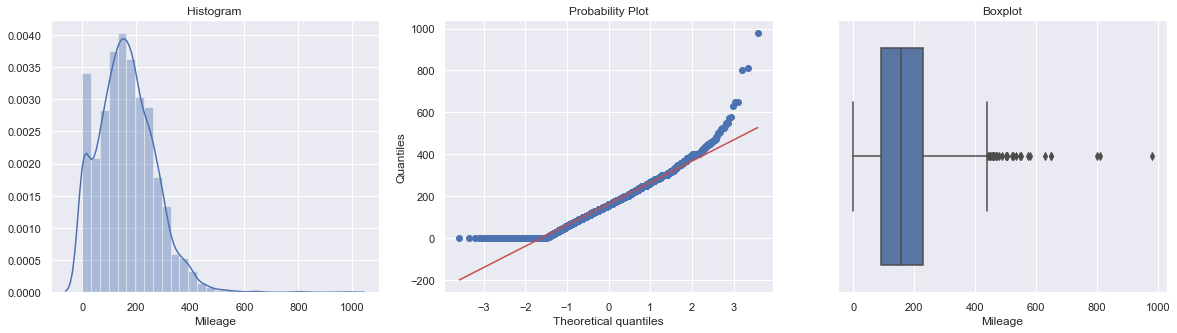

Skewness: 17.154962
Kurtosis: 316.181652


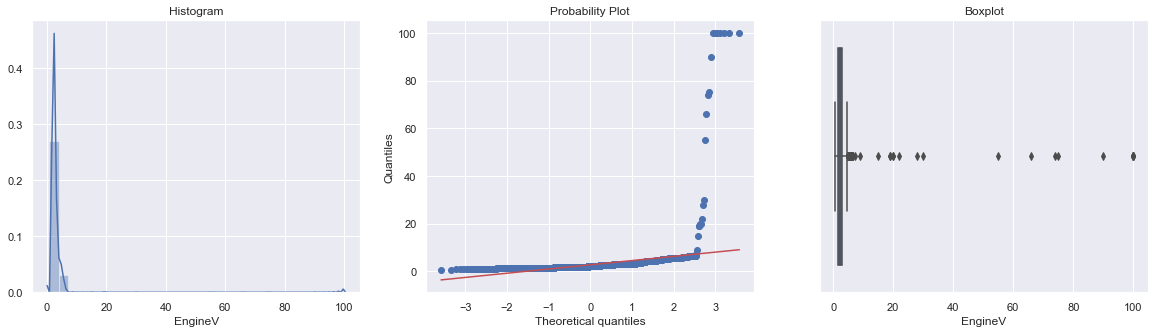

Skewness: -0.963945
Kurtosis: 0.999387


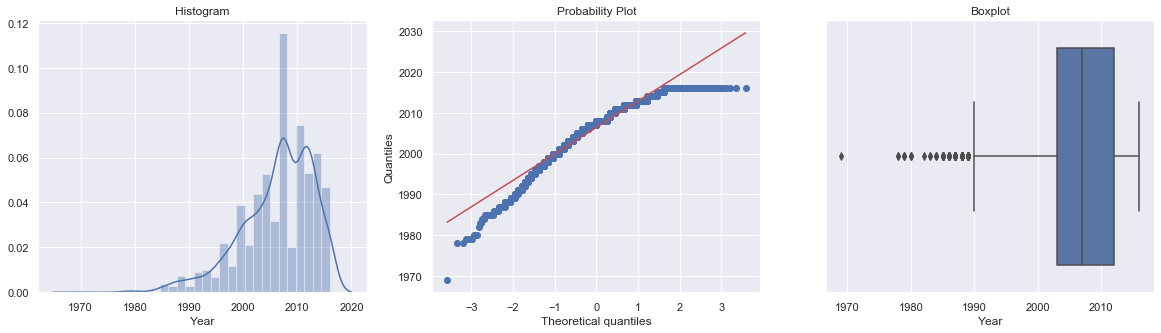

In [171]:
for var in cont_vars:
    analyse_continuous(df,var,target)

#### Bivariate analysis

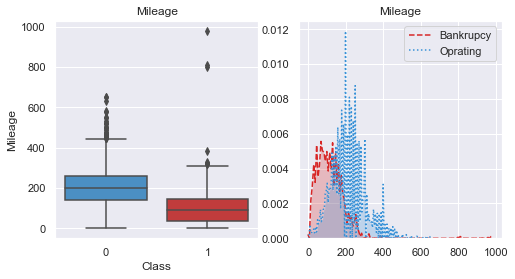

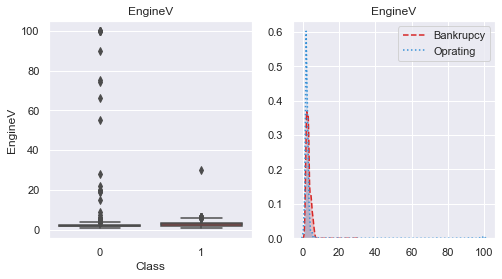

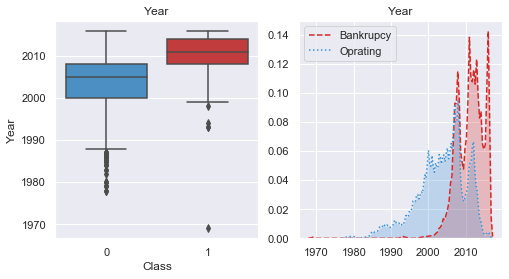

In [172]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=df,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(df[df.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(df[df.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Statistics test

In [173]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in num_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Mileage,36.2559,2.61373e-249
1,EngineV,-2.45385,0.0141755
2,Year,-40.4355,2.72294e-300


In [174]:
corr_df = X_train[cont_vars + ['Class']].corr()
corr_df.head()

,Mileage,EngineV,Year,Class
Mileage,1.000000,-0.046188,-0.720913,-0.525715
EngineV,-0.046188,1.000000,0.028103,0.418674
Year,-0.720913,0.028103,1.000000,0.544176
Class,-0.525715,0.418674,0.544176,1.000000


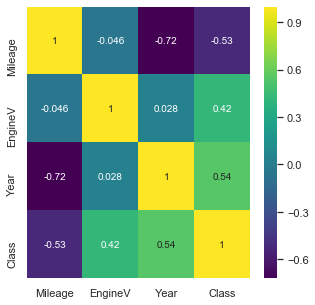

In [175]:
corr_df = X_train[cont_vars + ['Class']].corr()
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

## 4.6. Explore categorical vars

## 4.7. Summary

# 5. Data Cleaning

# 6. Data Driven Story

# 4. Separate train and test set

## 4.1. Categorize feature types

In [176]:
## target
target = ['Class']
print("\nTarget var: ", target)

text_vars = []

mixed_vars = ['address']

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\n========================================================================")
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

one_level = [var for var in cat_vars if len(df[var].unique()) == 1 if var not in mixed_vars+text_vars]
print("\nOne level vars: ", one_level)
print('There are {} One level variables'.format(len(one_level)))

low_levels = [var for var in cat_vars if len(df[var].unique()) <= 30 if var not in mixed_vars+text_vars]
print("\nLow cardinality vars: ", low_levels)
print('There are {} Low cardinality variables'.format(len(low_levels)))

high_levels = [var for var in cat_vars if len(df[var].unique()) > 30 if var not in mixed_vars+text_vars]
print("\nHigh cardinality vars: ", high_levels)
print('There are {} High cardinality variables'.format(len(high_levels)))

print("\nMixed type vars: ", mixed_vars)
print('There are {} Mixed type  variables'.format(len(mixed_vars)))

datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\n========================================================================")
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

print("\n========================================================================")
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target + datetime_vars + text_vars]
print("\n========================================================================")
print("\nNumerical vars: ", num_vars)
print('\nThere are {} Numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} Discrete variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} Continous variables'.format(len(cont_vars)))


Target var:  ['Class']


Categorical vars:  ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
There are 5 categorical variables

One level vars:  []
There are 0 One level variables

Low cardinality vars:  ['Brand', 'Body', 'Engine Type', 'Registration']
There are 4 Low cardinality variables

High cardinality vars:  ['Model']
There are 1 High cardinality variables

Mixed type vars:  ['address']
There are 1 Mixed type  variables


DateTime vars:  []
There are 0 DateTime variables


Text vars:  []
There are 0 Text variables


Numerical vars:  ['Mileage', 'EngineV', 'Year']

There are 3 Numerical variables

Discrete vars:  []
There are 0 Discrete variables

Continous vars:  ['Mileage', 'EngineV', 'Year']
There are 3 Continous variables


## 4.2. Separate into train and test set

In [177]:
# Separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(df, df.Class, test_size=0.2, random_state=0, stratify = df.Class)
X_train.shape, X_test.shape

((3220, 9), (805, 9))

In [178]:
print(y_train.sum()/y_train.count())
print(y_test.sum()/y_test.count())

0.3701863354037267
0.3701863354037267


# 7. Data Preprocessing and Engineering

## 7.1. Engineering numerical vars

### 7.1.1. Dealing with missing values

#### Removing rows with missing values

In [179]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class

### 7.1.2. Train model without preprocessing

In [180]:
Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.828571 (0.018982)
LR: 0.759627 (0.025276)
DT: 0.863975 (0.017612)
GNB: 0.724534 (0.021384)
RF: 0.890994 (0.016518)
GB: 0.895342 (0.012191)
LGB: 0.893789 (0.010375)
ADA: 0.891925 (0.015884)
QDA: 0.721739 (0.028538)
NN: 0.699689 (0.094218)
XGB: 0.894720 (0.012301)


In [181]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.8854037267080745
ROC AUC Score:  0.8708095058443535
Confusion matrix
Predicted     0    1
True                
0          1880  148
1           221  971
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2028
           1       0.87      0.81      0.84      1192

    accuracy                           0.89      3220
   macro avg       0.88      0.87      0.88      3220
weighted avg       0.88      0.89      0.88      3220

----------------------------------------------------------
Test set
Accuracy:  0.8298136645962733
ROC AUC Score:  0.8040255218881961
Confusion matrix
Predicted    0    1
True               
0          458   49
1           88  210
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       507
           1       0.81      0.70      0.75       298

    accuracy                           0.83       805
   macro avg       0.82      0.80      0.81  

Train set
Accuracy:  0.8953416149068323
ROC AUC Score:  0.8902843413684921
Confusion matrix
Predicted     0     1
True                 
0          1845   183
1           154  1038
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2028
           1       0.85      0.87      0.86      1192

    accuracy                           0.90      3220
   macro avg       0.89      0.89      0.89      3220
weighted avg       0.90      0.90      0.90      3220

----------------------------------------------------------
Test set
Accuracy:  0.8919254658385093
ROC AUC Score:  0.8844598440623221
Confusion matrix
Predicted    0    1
True               
0          463   44
1           43  255
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       507
           1       0.85      0.86      0.85       298

    accuracy                           0.89       805
   macro avg       0.88      0.88      0.88  

### 7.1.3. Treating outliers

In [182]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [183]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### Year

Skewness: -0.985945
Kurtosis: 1.079460


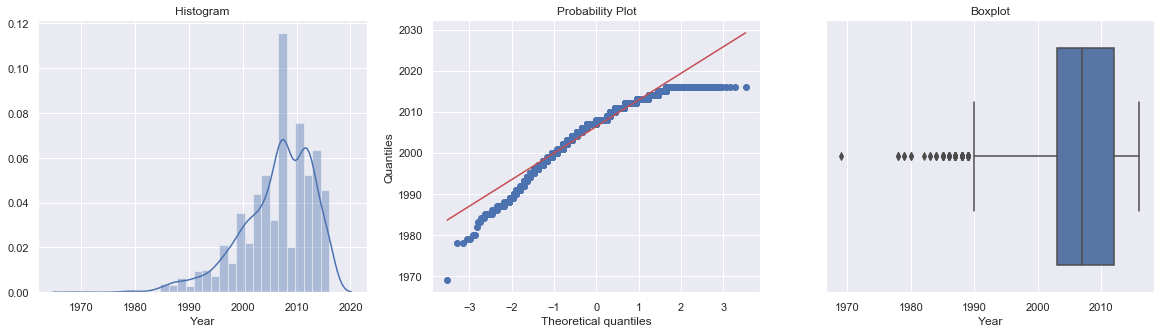

In [184]:
analyse_continuous(X_train,'Year',target)

In [185]:
# calculate boundaries for Year
upper_boundary, lower_boundary = find_normal_boundaries(df, 'Year')
upper_boundary, lower_boundary

(2026.46641322036, 1986.292841438025)

In [186]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(X_train)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(X_train[X_train['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(X_train[X_train['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['Year'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['Year'] < lower_boundary]) / len(X_train)))

total number of Year: 3220
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 31

% right end outliers: 0.0
% left end outliers: 0.009627329192546583


In [187]:
X_train = X_train[(X_train.Year < upper_boundary) & (X_train.Year > lower_boundary)]
X_test = X_test[(X_test.Year < upper_boundary) & (X_test.Year > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3189, 9)

Skewness: -0.776866
Kurtosis: 0.232474


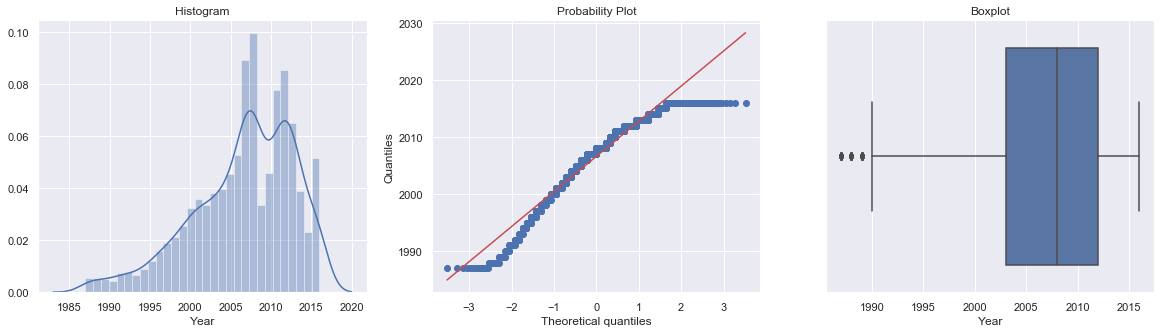

In [188]:
analyse_continuous(X_train,'Year',target)

#### Mileage

Skewness: 0.710819
Kurtosis: 1.912358


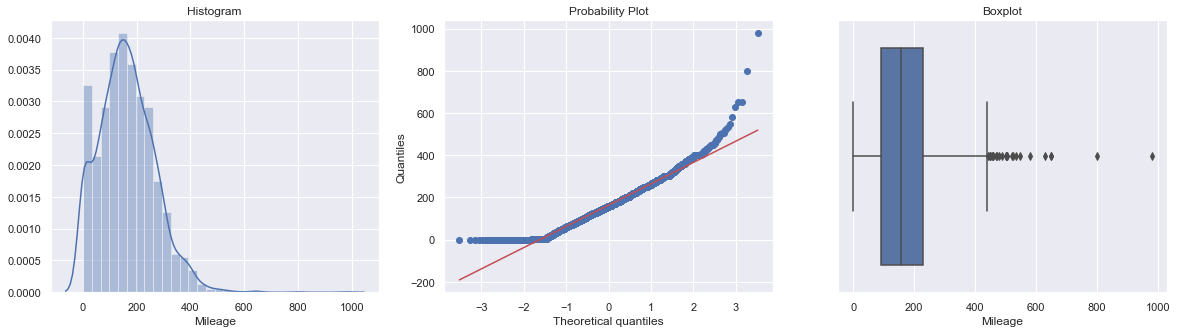

In [189]:
analyse_continuous(X_train,'Mileage',target)

In [190]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [191]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(X_train[X_train['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(X_train[X_train['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['Mileage'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['Mileage'] < lower_boundary]) / len(X_train)))

total number of Year: 4025
cars with more than upper_boundary of Mileage (right end outliers): 10
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.0031357792411414237
% left end outliers: 0.0


In [192]:
X_train = X_train[(X_train.Mileage < upper_boundary) & (X_train.Mileage > lower_boundary)]
X_test = X_test[(X_test.Mileage < upper_boundary) & (X_test.Mileage > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3179, 9)

Skewness: 0.384303
Kurtosis: -0.140341


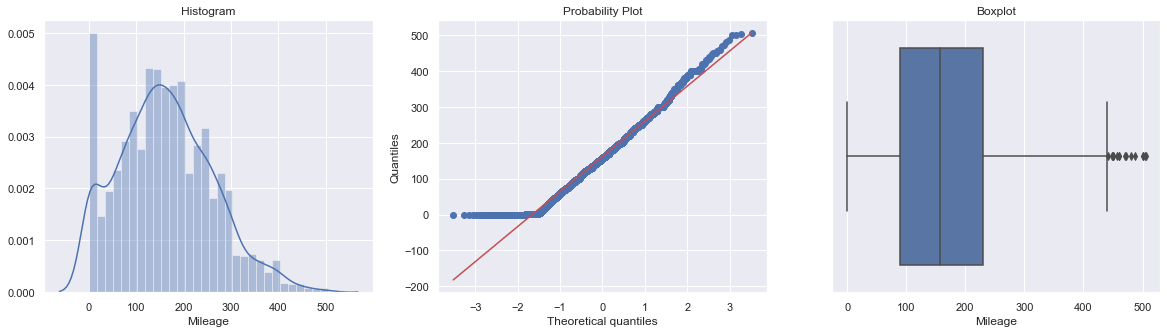

In [193]:
analyse_continuous(X_train,'Mileage',target)

#### EngineV

Skewness: 18.537557
Kurtosis: 375.277342


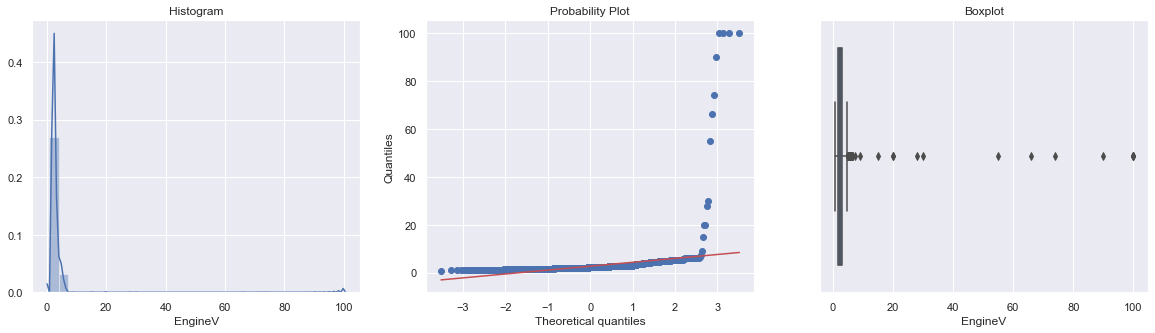

In [194]:
analyse_continuous(X_train,'EngineV',target)

In [195]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [196]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(X_train[X_train['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(X_train[X_train['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X_train[X_train['EngineV'] > upper_boundary]) / len(X_train)))

print('% left end outliers: {}'.format(
    len(X_train[X_train['EngineV'] < lower_boundary]) / len(X_train)))

total number of Year: 4025
cars with more than upper_boundary of Mileage (right end outliers): 13
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.004089336269267065
% left end outliers: 0.0


In [197]:
X_train = X_train[(X_train.EngineV < upper_boundary) & (X_train.EngineV > lower_boundary)]
X_test = X_test[(X_test.EngineV < upper_boundary) & (X_test.EngineV > lower_boundary)]

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = X_train.Class
y_test = X_test.Class
X_train.shape

(3165, 9)

Skewness: 1.495098
Kurtosis: 2.296473


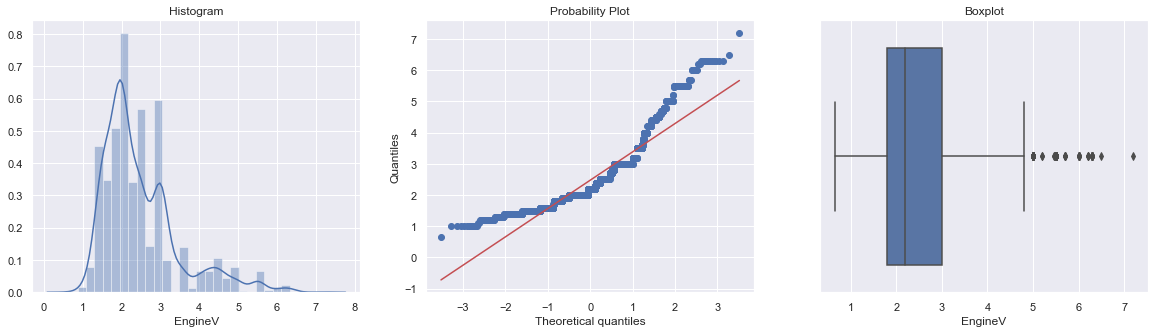

In [198]:
analyse_continuous(X_train,'EngineV',target)

In [199]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = num_vars

df0 = X_train[X_train['Class'] == 0]
df1 = X_train[X_train['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Mileage,34.7571,1.77865e-224
1,EngineV,-25.9283,1.45015e-134
2,Year,-36.4789,1.68886e-243


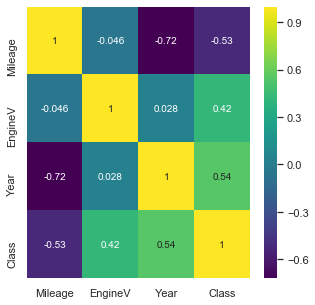

In [200]:
corr_df = X_train[cont_vars + ['Class']].corr()
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

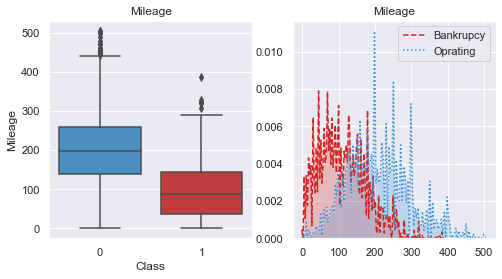

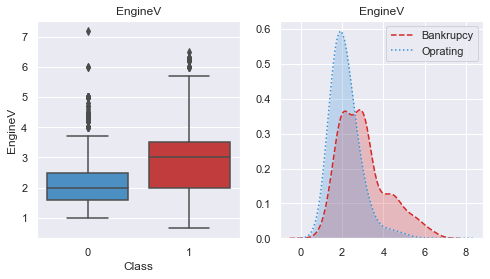

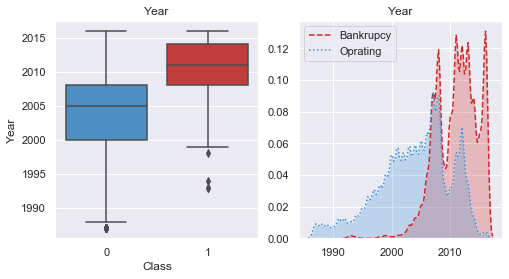

In [201]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=X_train,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(X_train[X_train.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(X_train[X_train.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Training model

In [203]:
Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.827484 (0.016426)
LR: 0.834112 (0.025685)
DT: 0.863836 (0.015117)
GNB: 0.828425 (0.020846)
RF: 0.890687 (0.013051)
GB: 0.894787 (0.010002)
LGB: 0.894167 (0.013399)
ADA: 0.889103 (0.011137)
QDA: 0.862541 (0.016337)
NN: 0.783866 (0.037217)
XGB: 0.895427 (0.014389)


In [204]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.8884676145339653
ROC AUC Score:  0.87461041880617
Confusion matrix
Predicted     0    1
True                
0          1839  138
1           215  973
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1977
           1       0.88      0.82      0.85      1188

    accuracy                           0.89      3165
   macro avg       0.89      0.87      0.88      3165
weighted avg       0.89      0.89      0.89      3165

----------------------------------------------------------
Test set
Accuracy:  0.8284625158831004
ROC AUC Score:  0.804555761698619
Confusion matrix
Predicted    0    1
True               
0          442   48
1           87  210
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       490
           1       0.81      0.71      0.76       297

    accuracy                           0.83       787
   macro avg       0.82      0.80      0.81     

Accuracy:  0.8938388625592417
ROC AUC Score:  0.8884839799103835
Confusion matrix
Predicted     0     1
True                 
0          1799   178
1           158  1030
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1977
           1       0.85      0.87      0.86      1188

    accuracy                           0.89      3165
   macro avg       0.89      0.89      0.89      3165
weighted avg       0.89      0.89      0.89      3165

----------------------------------------------------------
Test set
Accuracy:  0.8907242693773825
ROC AUC Score:  0.8850580636294922
Confusion matrix
Predicted    0    1
True               
0          445   45
1           41  256
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       490
           1       0.85      0.86      0.86       297

    accuracy                           0.89       787
   macro avg       0.88      0.89      0.88       787
w

### 7.1.4. Gaussian Transformation

+ transform Price to have linear relationship

#### Transform independent vars to have Normal distribution

Skewness: 0.572213
Kurtosis: 0.032702


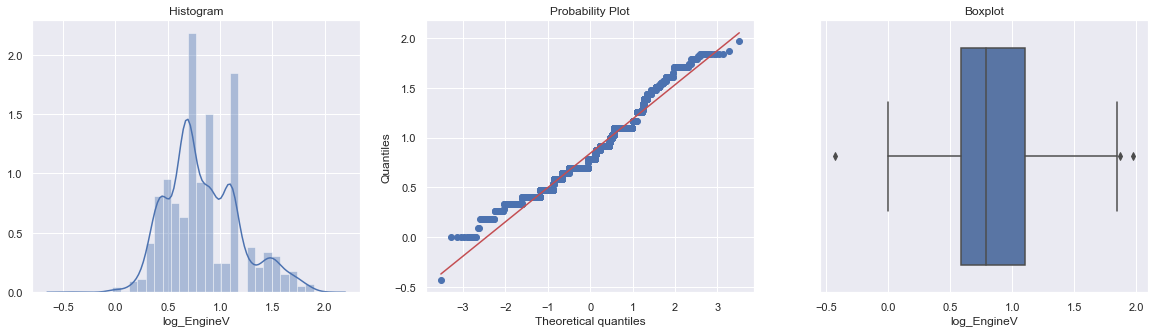

In [205]:
X_train['log_EngineV'] = np.log(X_train['EngineV'])
X_test['log_EngineV'] = np.log(X_test['EngineV'])

analyse_continuous(X_train,'log_EngineV',target)

Skewness: -0.788316
Kurtosis: 0.262280


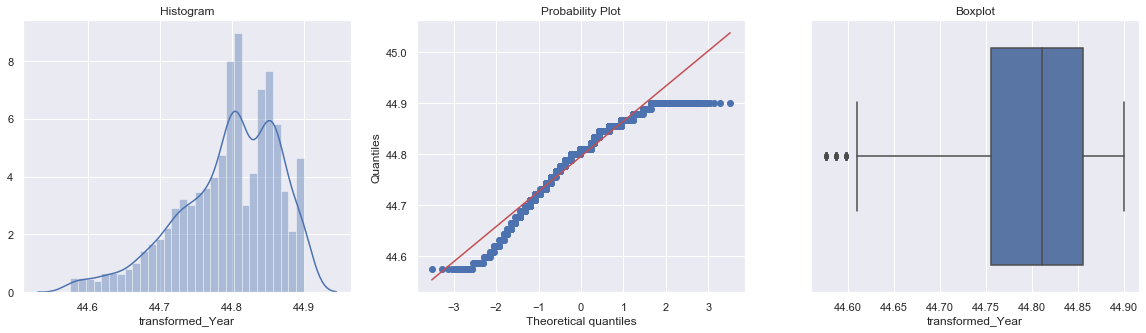

In [206]:
X_train['transformed_Year'] = X_train.Year**(1/2)
X_test['transformed_Year'] = X_test.Year**(1/2)

analyse_continuous(X_train,'transformed_Year',target)

In [208]:
cont_vars  = ['transformed_Year','Mileage','log_EngineV']

Predictive_Model(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

Optimization terminated successfully.
         Current function value: 0.269006
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3165
Model:                          Logit   Df Residuals:                     3161
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.5935
Time:                        06:03:10   Log-Likelihood:                -851.40
converged:                       True   LL-Null:                       -2094.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1975.8169    111.223    -17.764      0.000   -2193.810   -1757.823
transforme

In [209]:
cont_vars  = ['Year','Mileage','log_EngineV']

Predictive_Model(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

Optimization terminated successfully.
         Current function value: 0.269005
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3165
Model:                          Logit   Df Residuals:                     3161
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.5935
Time:                        06:03:10   Log-Likelihood:                -851.40
converged:                       True   LL-Null:                       -2094.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -990.3385     55.717    -17.774      0.000   -1099.542    -881.135
Year            0.4908   

In [210]:
import scipy


ttest_df = pd.DataFrame(columns = ['Feature','t-stats','p-value'])
ttest_df['Feature'] = cont_vars

df0 = X_train[X_train['Class'] == 0]
df1 = X_train[X_train['Class'] == 1]

for var in cont_vars:
    result = scipy.stats.ttest_ind(df0[var], df1[var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
  
ttest_df

,Feature,t-stats,p-value
0,Year,-36.4789,1.68886e-243
1,Mileage,34.7571,1.77865e-224
2,log_EngineV,-26.1901,5.23009e-137


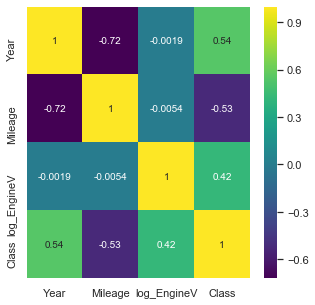

In [211]:
corr_df = X_train[cont_vars + ['Class']].corr()
# correlation matrix
plt.figure(figsize = (5,5))
sns.heatmap(corr_df, annot = True, cmap='viridis')
plt.show()

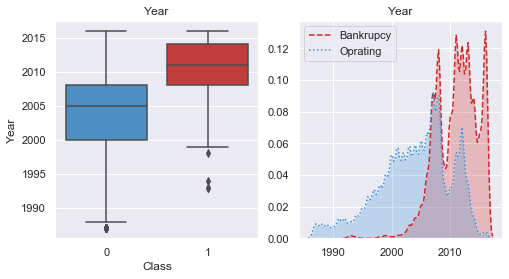

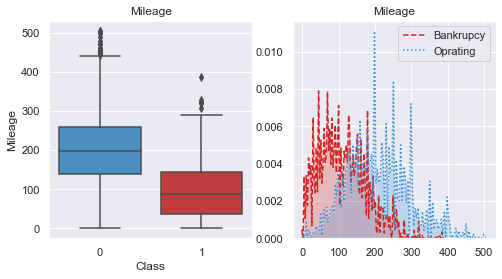

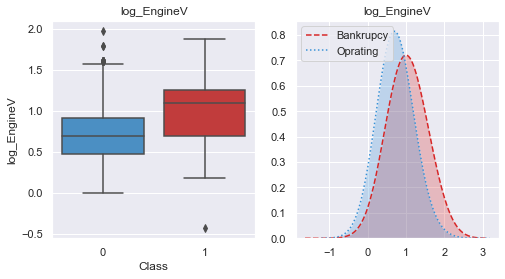

In [212]:
colors = ['#3791D7','#D72626']

for column in cont_vars:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column,data=X_train,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(X_train[X_train.Class==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(X_train[X_train.Class==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

#### Training model

In [213]:
Model_Selection(X_train[cont_vars], y_train, X_test[cont_vars], y_test)

KNN: 0.796519 (0.019080)
LR: 0.841063 (0.024156)
DT: 0.864470 (0.016124)
GNB: 0.833480 (0.022634)
RF: 0.890054 (0.014262)
GB: 0.894787 (0.010002)
LGB: 0.894167 (0.013399)
ADA: 0.889103 (0.011137)
QDA: 0.870769 (0.009686)
NN: 0.723817 (0.070688)
XGB: 0.895427 (0.014389)


In [214]:
ModelEvaluation(X_train[cont_vars],  y_train, X_test[cont_vars],y_test)

KNN
Train set
Accuracy:  0.8644549763033176
ROC AUC Score:  0.8479988299791031
Confusion matrix
Predicted     0    1
True                
0          1807  170
1           259  929
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1977
           1       0.85      0.78      0.81      1188

    accuracy                           0.86      3165
   macro avg       0.86      0.85      0.85      3165
weighted avg       0.86      0.86      0.86      3165

----------------------------------------------------------
Test set
Accuracy:  0.806861499364676
ROC AUC Score:  0.7858826358826358
Confusion matrix
Predicted    0    1
True               
0          427   63
1           89  208
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       490
           1       0.77      0.70      0.73       297

    accuracy                           0.81       787
   macro avg       0.80      0.79      0.79   

Train set
Accuracy:  0.8938388625592417
ROC AUC Score:  0.8884839799103835
Confusion matrix
Predicted     0     1
True                 
0          1799   178
1           158  1030
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1977
           1       0.85      0.87      0.86      1188

    accuracy                           0.89      3165
   macro avg       0.89      0.89      0.89      3165
weighted avg       0.89      0.89      0.89      3165

----------------------------------------------------------
Test set
Accuracy:  0.8907242693773825
ROC AUC Score:  0.8850580636294922
Confusion matrix
Predicted    0    1
True               
0          445   45
1           41  256
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       490
           1       0.85      0.86      0.86       297

    accuracy                           0.89       787
   macro avg       0.88      0.89      0.88  

## 7.2. Engineering categorical vars

### 7.2.1. Data Overview

In [100]:
X_train[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model
0,Volkswagen,van,Diesel,yes,T4 (Transporter)
1,Mercedes-Benz,crossover,Diesel,yes,ML 350
2,Volkswagen,other,Petrol,yes,T5 (Transporter)
3,Toyota,other,Diesel,yes,Hilux
4,BMW,sedan,Petrol,yes,525


### 7.2.2. Engineering mixed vars

https://www.geeksforgeeks.org/python-extract-numbers-from-string/

https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8


In [101]:
print(len(X_train.Model.unique()))
X_train.Model.unique()

286


array(['T4 (Transporter)', 'ML 350', 'T5 (Transporter)', 'Hilux', '525',
       'Pajero Sport', '80', '640', 'Camry', 'Lancer X', '200', 'TT',
       'E-Class', 'A4', 'Golf IV', 'Passat B7', 'Golf II', 'Dokker',
       'Passat CC', '520', 'Laguna', '5', 'T5 (Transporter) ', 'S 500',
       'Trafic', 'Megane', 'Passat B6', 'Touareg', 'S 550', 'Corolla',
       'A8', 'Rav 4', 'Land Cruiser Prado', 'Golf Variant', 'Lancer',
       'GL 450', 'Carisma', 'GLS 350', 'Kangoo', 'T6 (Transporter) ',
       '528', 'A6', '523', 'X5', 'Land Cruiser 200', 'Q7', 'Vito',
       'Tundra', '530', 'Polo', 'S 140', '735', 'X5 M', 'Passat B3',
       'T6 (Transporter)', 'A6 Allroad', 'A 170', 'Golf III', 'Fluence',
       'Golf VI', 'Galant', 'ML 320', 'Clio', '320', 'Caddy', 'Passat B5',
       '190', 'GLK 300', 'Jetta', 'C-Class', 'Outlander XL', 'S 63 AMG',
       'Logan', 'CL 500', 'Pajero Wagon', 'GL 350', '330', 'Phaeton',
       '750', 'Lancer X Sportback', '740', 'GLC-Class', 'Outlander',
       'G

In [102]:
X_train.Model = X_train.Model.apply(lambda x:x.strip())
X_test.Model = X_test.Model.apply(lambda x:x.strip())

In [103]:
print(len(X_train.Model.unique()))
X_train.Model.unique()

283


array(['T4 (Transporter)', 'ML 350', 'T5 (Transporter)', 'Hilux', '525',
       'Pajero Sport', '80', '640', 'Camry', 'Lancer X', '200', 'TT',
       'E-Class', 'A4', 'Golf IV', 'Passat B7', 'Golf II', 'Dokker',
       'Passat CC', '520', 'Laguna', '5', 'S 500', 'Trafic', 'Megane',
       'Passat B6', 'Touareg', 'S 550', 'Corolla', 'A8', 'Rav 4',
       'Land Cruiser Prado', 'Golf Variant', 'Lancer', 'GL 450',
       'Carisma', 'GLS 350', 'Kangoo', 'T6 (Transporter)', '528', 'A6',
       '523', 'X5', 'Land Cruiser 200', 'Q7', 'Vito', 'Tundra', '530',
       'Polo', 'S 140', '735', 'X5 M', 'Passat B3', 'A6 Allroad', 'A 170',
       'Golf III', 'Fluence', 'Golf VI', 'Galant', 'ML 320', 'Clio',
       '320', 'Caddy', 'Passat B5', '190', 'GLK 300', 'Jetta', 'C-Class',
       'Outlander XL', 'S 63 AMG', 'Logan', 'CL 500', 'Pajero Wagon',
       'GL 350', '330', 'Phaeton', '750', 'Lancer X Sportback', '740',
       'GLC-Class', 'Outlander', 'G 350', 'Auris', 'Space Star', 'Tiguan',
       'S

#### Create dummy vars for all labels without removing first var

In [104]:
Train_dummy_df = pd.get_dummies(X_train.Model, drop_first=True)
print(Train_dummy_df.shape)
Train_dummy_df.head()

(3165, 282)


,100,11,116,118,19,190,200,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,4Runner,5,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,730,735,740,745,750,760,80,9,90,A 140,A 150,A 170,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 170,B 180,B 200,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 200,CLK 200,CLK 220,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 350,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLK 300,GLS 350,GLS 400,GLS 500,GLS 63,Galant,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Logan,Lupo,M5,M6,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 430,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Polo,Previa,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 550,S 600,S 63 AMG,S 65 AMG,S-Guard,S4,S5,S8,SL 500 (550),SLK 200,SLK 350,Sandero,Sandero StepWay,Scenic,Scion,Scirocco,Sequoia,Sharan,Sienna,Space Star,Space Wagon,Sprinter 208,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 316,Sprinter 318,Sprinter 319,Sprinter 324,Symbol,Syncro,T3 (Transporter),T4 (Transporter),T5 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [105]:
Test_dummy_df = pd.get_dummies(X_test.Model, drop_first=True)
print(Test_dummy_df.shape)
Test_dummy_df.head()

(787, 164)


,120,190,210,230,316,318,320,325,330,428,5 Series,520,523,525,528,530,535,540,640,730,735,745,750,760,80,A 140,A 150,A 170,A 180,A1,A3,A4,A5,A6,A6 Allroad,A8,ASX,Auris,Avensis,Aygo,B 180,Bora,C-Class,CL 500,CL 55 AMG,CL 63 AMG,CLA 200,CLC 180,CLK 200,CLK 320,CLS 400,Caddy,Camry,Caravelle,Carisma,Clio,Colt,Corolla,Duster,E-Class,Espace,FJ Cruiser,Fluence,G 500,G 55 AMG,G 63 AMG,GL 350,GLE-Class,GLK 220,GLS 350,GLS 63,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Grand Scenic,Highlander,Hilux,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer X,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser Prado,Logan,MB,ML 250,ML 350,ML 400,Master,Megane,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Sport,Pajero Wagon,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Q5,Q7,Rav 4,S 250,S 320,S 350,S 400,S 500,S 600,S 63 AMG,S8,SL 55 AMG,SLK 200,Sandero,Scenic,Scirocco,Smart,Space Star,Sprinter,Sprinter 210,Sprinter 312,Sprinter 313,Symbol,T4 (Transporter),T5 (Transporter),T6 (Transporter),Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vento,Venza,Viano,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Test_dummy_df[var] = int(0)
    
len(Test_dummy_df.columns)

133


297

In [107]:
Test_dummy_df.head()

,120,190,210,230,316,318,320,325,330,428,5 Series,520,523,525,528,530,535,540,640,730,735,745,750,760,80,A 140,A 150,A 170,A 180,A1,A3,A4,A5,A6,A6 Allroad,A8,ASX,Auris,Avensis,Aygo,B 180,Bora,C-Class,CL 500,CL 55 AMG,CL 63 AMG,CLA 200,CLC 180,CLK 200,CLK 320,CLS 400,Caddy,Camry,Caravelle,Carisma,Clio,Colt,Corolla,Duster,E-Class,Espace,FJ Cruiser,Fluence,G 500,G 55 AMG,G 63 AMG,GL 350,GLE-Class,GLK 220,GLS 350,GLS 63,Galant,Golf GTI,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Grand Scenic,Highlander,Hilux,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer X,Land Cruiser 100,Land Cruiser 105,Land Cruiser 200,Land Cruiser Prado,Logan,MB,ML 250,ML 350,ML 400,Master,Megane,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Sport,Pajero Wagon,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Pointer,Polo,Q5,Q7,Rav 4,S 250,S 320,S 350,S 400,S 500,S 600,S 63 AMG,S8,SL 55 AMG,SLK 200,Sandero,Scenic,Scirocco,Smart,Space Star,Sprinter,Sprinter 210,Sprinter 312,Sprinter 313,Symbol,T4 (Transporter),T5 (Transporter),T6 (Transporter),Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V 250,Vento,Venza,Viano,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,100,11,116,118,19,200,220,25,250,300,323,324,328,335,4 Series Gran Coupe,4Runner,5,5 Series GT,524,545,550,6 Series Gran Coupe,630,645,650,740,9,90,A4 Allroad,A7,Amarok,Avalon,B 170,B 200,Beetle,CL 180,CL 550,CLA 220,CLA-Class,CLC 200,CLK 220,CLK 230,CLK 240,CLK 280,CLK 430,CLS 350,CLS 500,CLS 63 AMG,Captur,Carina,Celica,Corolla Verso,Cross Touran,Dokker,Eclipse,Eos,Fortuner,G 320,G 350,GL 320,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLK 300,GLS 400,GLS 500,Golf Variant,Grandis,Hiace,I3,IQ,Lancer Evolution,Lancer X Sportback,Land Cruiser 76,Land Cruiser 80,Latitude,Lupo,M5,M6,ML 270,ML 280,ML 320,ML 430,ML 500,ML 550,ML 63 AMG,Mark II,Matrix,Modus,Pajero Pinin,Passat B2,Previa,Prius,Q3,R 320,R8,S 140,S 300,S 420,S 430,S 550,S 65 AMG,S-Guard,S4,S5,SL 500 (550),SLK 350,Sandero StepWay,Scion,Sequoia,Sharan,Sienna,Space Wagon,Sprinter 208,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 311,Sprinter 315,Sprinter 316,Sprinter 318,Sprinter 319,Sprinter 324,Syncro,T3 (Transporter),TT,Vaneo,Virage,Vista,Z3,Z4
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0

In [108]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Train_dummy_df[var] = int(0)
    
len(Train_dummy_df.columns)

15


297

In [109]:
Train_dummy_df.head()

,100,11,116,118,19,190,200,210,220,230,25,250,300,316,318,320,323,324,325,328,330,335,4 Series Gran Coupe,4Runner,5,5 Series,5 Series GT,520,523,524,525,528,530,535,540,545,550,6 Series Gran Coupe,630,640,645,650,730,735,740,745,750,760,80,9,90,A 140,A 150,A 170,A1,A3,A4,A4 Allroad,A5,A6,A6 Allroad,A7,A8,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B 170,B 180,B 200,Beetle,Bora,C-Class,CL 180,CL 500,CL 55 AMG,CL 550,CL 63 AMG,CLA 200,CLA 220,CLA-Class,CLC 200,CLK 200,CLK 220,CLK 230,CLK 240,CLK 280,CLK 320,CLK 430,CLS 350,CLS 500,CLS 63 AMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,Corolla Verso,Cross Touran,Dokker,Duster,E-Class,Eclipse,Eos,Espace,FJ Cruiser,Fluence,Fortuner,G 320,G 350,G 500,G 55 AMG,G 63 AMG,GL 320,GL 350,GL 420,GL 450,GL 500,GL 550,GLC-Class,GLE-Class,GLK 220,GLK 300,GLS 350,GLS 400,GLS 500,GLS 63,Galant,Golf II,Golf III,Golf IV,Golf Plus,Golf V,Golf VI,Golf VII,Golf Variant,Grand Scenic,Grandis,Hiace,Highlander,Hilux,I3,IQ,Jetta,Kangoo,Koleos,L 200,LT,Laguna,Lancer,Lancer Evolution,Lancer X,Lancer X Sportback,Land Cruiser 100,Land Cruiser 200,Land Cruiser 76,Land Cruiser 80,Land Cruiser Prado,Latitude,Logan,Lupo,M5,M6,ML 250,ML 270,ML 280,ML 320,ML 350,ML 400,ML 430,ML 500,ML 550,ML 63 AMG,Mark II,Master,Matrix,Megane,Modus,Multivan,New Beetle,Outlander,Outlander XL,Pajero,Pajero Pinin,Pajero Sport,Pajero Wagon,Passat B2,Passat B3,Passat B4,Passat B5,Passat B6,Passat B7,Passat B8,Passat CC,Phaeton,Polo,Previa,Prius,Q3,Q5,Q7,R 320,R8,Rav 4,S 140,S 300,S 320,S 350,S 400,S 420,S 430,S 500,S 550,S 600,S 63 AMG,S 65 AMG,S-Guard,S4,S5,S8,SL 500 (550),SLK 200,SLK 350,Sandero,Sandero StepWay,Scenic,Scion,Scirocco,Sequoia,Sharan,Sienna,Space Star,Space Wagon,Sprinter 208,Sprinter 211,Sprinter 212,Sprinter 213,Sprinter 311,Sprinter 312,Sprinter 313,Sprinter 315,Sprinter 316,Sprinter 318,Sprinter 319,Sprinter 324,Symbol,Syncro,T3 (Transporter),T4 (Transporter),T5 (Transporter),T6 (Transporter),TT,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V 250,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X1,X3,X5,X5 M,X6,X6 M,Yaris,Z3,Z4,120,428,A 180,CLC 180,CLS 400,Golf GTI,Land Cruiser 105,MB,Pointer,S 250,SL 55 AMG,Smart,Sprinter,Sprinter 210,Up
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0

In [110]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [112]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.804419 (0.018596)
LR: 0.887193 (0.013433)
DT: 0.924477 (0.014002)
GNB: 0.809769 (0.024130)
RF: 0.941853 (0.009975)
GB: 0.929236 (0.010620)
LGB: 0.928278 (0.010095)
ADA: 0.925436 (0.013776)
QDA: 0.664747 (0.035311)
NN: 0.872035 (0.023601)
XGB: 0.926079 (0.015694)


In [113]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.8755134281200632
ROC AUC Score:  0.8602099651037436
Confusion matrix
Predicted     0    1
True                
0          1822  155
1           239  949
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1977
           1       0.86      0.80      0.83      1188

    accuracy                           0.88      3165
   macro avg       0.87      0.86      0.87      3165
weighted avg       0.87      0.88      0.87      3165

----------------------------------------------------------
Test set
Accuracy:  0.806861499364676
ROC AUC Score:  0.7858826358826358
Confusion matrix
Predicted    0    1
True               
0          427   63
1           89  208
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       490
           1       0.77      0.70      0.73       297

    accuracy                           0.81       787
   macro avg       0.80      0.79      0.79   

Train set
Accuracy:  0.9358609794628752
ROC AUC Score:  0.9264879446973528
Confusion matrix
Predicted     0     1
True                 
0          1906    71
1           132  1056
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1977
           1       0.94      0.89      0.91      1188

    accuracy                           0.94      3165
   macro avg       0.94      0.93      0.93      3165
weighted avg       0.94      0.94      0.94      3165

----------------------------------------------------------
Test set
Accuracy:  0.8767471410419314
ROC AUC Score:  0.8638871710300282
Confusion matrix
Predicted    0    1
True               
0          449   41
1           56  241
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       490
           1       0.85      0.81      0.83       297

    accuracy                           0.88       787
   macro avg       0.87      0.86      0.87  

ValueError: feature_names mismatch: ['Year', 'Mileage', 'log_EngineV', '100', '11', '116', '118', '19', '190', '200', '210', '220', '230', '25', '250', '300', '316', '318', '320', '323', '324', '325', '328', '330', '335', '4 Series Gran Coupe', '4Runner', '5', '5 Series', '5 Series GT', '520', '523', '524', '525', '528', '530', '535', '540', '545', '550', '6 Series Gran Coupe', '630', '640', '645', '650', '730', '735', '740', '745', '750', '760', '80', '9', '90', 'A 140', 'A 150', 'A 170', 'A1', 'A3', 'A4', 'A4 Allroad', 'A5', 'A6', 'A6 Allroad', 'A7', 'A8', 'ASX', 'Amarok', 'Auris', 'Avalon', 'Avensis', 'Aygo', 'B 170', 'B 180', 'B 200', 'Beetle', 'Bora', 'C-Class', 'CL 180', 'CL 500', 'CL 55 AMG', 'CL 550', 'CL 63 AMG', 'CLA 200', 'CLA 220', 'CLA-Class', 'CLC 200', 'CLK 200', 'CLK 220', 'CLK 230', 'CLK 240', 'CLK 280', 'CLK 320', 'CLK 430', 'CLS 350', 'CLS 500', 'CLS 63 AMG', 'Caddy', 'Camry', 'Captur', 'Caravelle', 'Carina', 'Carisma', 'Celica', 'Clio', 'Colt', 'Corolla', 'Corolla Verso', 'Cross Touran', 'Dokker', 'Duster', 'E-Class', 'Eclipse', 'Eos', 'Espace', 'FJ Cruiser', 'Fluence', 'Fortuner', 'G 320', 'G 350', 'G 500', 'G 55 AMG', 'G 63 AMG', 'GL 320', 'GL 350', 'GL 420', 'GL 450', 'GL 500', 'GL 550', 'GLC-Class', 'GLE-Class', 'GLK 220', 'GLK 300', 'GLS 350', 'GLS 400', 'GLS 500', 'GLS 63', 'Galant', 'Golf II', 'Golf III', 'Golf IV', 'Golf Plus', 'Golf V', 'Golf VI', 'Golf VII', 'Golf Variant', 'Grand Scenic', 'Grandis', 'Hiace', 'Highlander', 'Hilux', 'I3', 'IQ', 'Jetta', 'Kangoo', 'Koleos', 'L 200', 'LT', 'Laguna', 'Lancer', 'Lancer Evolution', 'Lancer X', 'Lancer X Sportback', 'Land Cruiser 100', 'Land Cruiser 200', 'Land Cruiser 76', 'Land Cruiser 80', 'Land Cruiser Prado', 'Latitude', 'Logan', 'Lupo', 'M5', 'M6', 'ML 250', 'ML 270', 'ML 280', 'ML 320', 'ML 350', 'ML 400', 'ML 430', 'ML 500', 'ML 550', 'ML 63 AMG', 'Mark II', 'Master', 'Matrix', 'Megane', 'Modus', 'Multivan', 'New Beetle', 'Outlander', 'Outlander XL', 'Pajero', 'Pajero Pinin', 'Pajero Sport', 'Pajero Wagon', 'Passat B2', 'Passat B3', 'Passat B4', 'Passat B5', 'Passat B6', 'Passat B7', 'Passat B8', 'Passat CC', 'Phaeton', 'Polo', 'Previa', 'Prius', 'Q3', 'Q5', 'Q7', 'R 320', 'R8', 'Rav 4', 'S 140', 'S 300', 'S 320', 'S 350', 'S 400', 'S 420', 'S 430', 'S 500', 'S 550', 'S 600', 'S 63 AMG', 'S 65 AMG', 'S-Guard', 'S4', 'S5', 'S8', 'SL 500 (550)', 'SLK 200', 'SLK 350', 'Sandero', 'Sandero StepWay', 'Scenic', 'Scion', 'Scirocco', 'Sequoia', 'Sharan', 'Sienna', 'Space Star', 'Space Wagon', 'Sprinter 208', 'Sprinter 211', 'Sprinter 212', 'Sprinter 213', 'Sprinter 311', 'Sprinter 312', 'Sprinter 313', 'Sprinter 315', 'Sprinter 316', 'Sprinter 318', 'Sprinter 319', 'Sprinter 324', 'Symbol', 'Syncro', 'T3 (Transporter)', 'T4 (Transporter)', 'T5 (Transporter)', 'T6 (Transporter)', 'TT', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'V 250', 'Vaneo', 'Vento', 'Venza', 'Viano', 'Virage', 'Vista', 'Vito', 'X1', 'X3', 'X5', 'X5 M', 'X6', 'X6 M', 'Yaris', 'Z3', 'Z4', '120', '428', 'A 180', 'CLC 180', 'CLS 400', 'Golf GTI', 'Land Cruiser 105', 'MB', 'Pointer', 'S 250', 'SL 55 AMG', 'Smart', 'Sprinter', 'Sprinter 210', 'Up'] ['Year', 'Mileage', 'log_EngineV', '120', '190', '210', '230', '316', '318', '320', '325', '330', '428', '5 Series', '520', '523', '525', '528', '530', '535', '540', '640', '730', '735', '745', '750', '760', '80', 'A 140', 'A 150', 'A 170', 'A 180', 'A1', 'A3', 'A4', 'A5', 'A6', 'A6 Allroad', 'A8', 'ASX', 'Auris', 'Avensis', 'Aygo', 'B 180', 'Bora', 'C-Class', 'CL 500', 'CL 55 AMG', 'CL 63 AMG', 'CLA 200', 'CLC 180', 'CLK 200', 'CLK 320', 'CLS 400', 'Caddy', 'Camry', 'Caravelle', 'Carisma', 'Clio', 'Colt', 'Corolla', 'Duster', 'E-Class', 'Espace', 'FJ Cruiser', 'Fluence', 'G 500', 'G 55 AMG', 'G 63 AMG', 'GL 350', 'GLE-Class', 'GLK 220', 'GLS 350', 'GLS 63', 'Galant', 'Golf GTI', 'Golf II', 'Golf III', 'Golf IV', 'Golf Plus', 'Golf V', 'Golf VI', 'Golf VII', 'Grand Scenic', 'Highlander', 'Hilux', 'Jetta', 'Kangoo', 'Koleos', 'L 200', 'LT', 'Laguna', 'Lancer', 'Lancer X', 'Land Cruiser 100', 'Land Cruiser 105', 'Land Cruiser 200', 'Land Cruiser Prado', 'Logan', 'MB', 'ML 250', 'ML 350', 'ML 400', 'Master', 'Megane', 'Multivan', 'New Beetle', 'Outlander', 'Outlander XL', 'Pajero', 'Pajero Sport', 'Pajero Wagon', 'Passat B3', 'Passat B4', 'Passat B5', 'Passat B6', 'Passat B7', 'Passat B8', 'Passat CC', 'Phaeton', 'Pointer', 'Polo', 'Q5', 'Q7', 'Rav 4', 'S 250', 'S 320', 'S 350', 'S 400', 'S 500', 'S 600', 'S 63 AMG', 'S8', 'SL 55 AMG', 'SLK 200', 'Sandero', 'Scenic', 'Scirocco', 'Smart', 'Space Star', 'Sprinter', 'Sprinter 210', 'Sprinter 312', 'Sprinter 313', 'Symbol', 'T4 (Transporter)', 'T5 (Transporter)', 'T6 (Transporter)', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'Up', 'V 250', 'Vento', 'Venza', 'Viano', 'Vito', 'X1', 'X3', 'X5', 'X5 M', 'X6', 'X6 M', 'Yaris', '100', '11', '116', '118', '19', '200', '220', '25', '250', '300', '323', '324', '328', '335', '4 Series Gran Coupe', '4Runner', '5', '5 Series GT', '524', '545', '550', '6 Series Gran Coupe', '630', '645', '650', '740', '9', '90', 'A4 Allroad', 'A7', 'Amarok', 'Avalon', 'B 170', 'B 200', 'Beetle', 'CL 180', 'CL 550', 'CLA 220', 'CLA-Class', 'CLC 200', 'CLK 220', 'CLK 230', 'CLK 240', 'CLK 280', 'CLK 430', 'CLS 350', 'CLS 500', 'CLS 63 AMG', 'Captur', 'Carina', 'Celica', 'Corolla Verso', 'Cross Touran', 'Dokker', 'Eclipse', 'Eos', 'Fortuner', 'G 320', 'G 350', 'GL 320', 'GL 420', 'GL 450', 'GL 500', 'GL 550', 'GLC-Class', 'GLK 300', 'GLS 400', 'GLS 500', 'Golf Variant', 'Grandis', 'Hiace', 'I3', 'IQ', 'Lancer Evolution', 'Lancer X Sportback', 'Land Cruiser 76', 'Land Cruiser 80', 'Latitude', 'Lupo', 'M5', 'M6', 'ML 270', 'ML 280', 'ML 320', 'ML 430', 'ML 500', 'ML 550', 'ML 63 AMG', 'Mark II', 'Matrix', 'Modus', 'Pajero Pinin', 'Passat B2', 'Previa', 'Prius', 'Q3', 'R 320', 'R8', 'S 140', 'S 300', 'S 420', 'S 430', 'S 550', 'S 65 AMG', 'S-Guard', 'S4', 'S5', 'SL 500 (550)', 'SLK 350', 'Sandero StepWay', 'Scion', 'Sequoia', 'Sharan', 'Sienna', 'Space Wagon', 'Sprinter 208', 'Sprinter 211', 'Sprinter 212', 'Sprinter 213', 'Sprinter 311', 'Sprinter 315', 'Sprinter 316', 'Sprinter 318', 'Sprinter 319', 'Sprinter 324', 'Syncro', 'T3 (Transporter)', 'TT', 'Vaneo', 'Virage', 'Vista', 'Z3', 'Z4']

#### Extract numerical part and categorical part

In [117]:
import re 

def LetterPart_Extraction(init_string):
    # letter_part = " ".join(re.findall("[a-zA-Z]+", ini_string)) 
    letter_part = ''.join(filter(lambda chr: chr.isalpha(), init_string))
    return letter_part

def NumberPart_Extraction(init_string):
    # number_part = [int(s) for s in init_string.split() if s.isdigit()]
    number_part = ''.join(filter(lambda i: i.isdigit(), init_string))
    # number_part = list(map(int, re.findall(r'\d+', init_string))) 
    return number_part

X_train['Model_categorical'] = X_train.Model.apply(lambda x:LetterPart_Extraction(x))
X_train['Model_numerical'] = X_train.Model.apply(lambda x:NumberPart_Extraction(x))

X_test['Model_categorical'] = X_test.Model.apply(lambda x:LetterPart_Extraction(x))
X_test['Model_numerical'] = X_test.Model.apply(lambda x:NumberPart_Extraction(x))
X_train.head(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Class,log_EngineV,transformed_Year,Model_categorical,Model_numerical
0,Volkswagen,van,380,2.5,Diesel,yes,2000,T4 (Transporter),0,0.916291,44.721360,TTransporter,4
1,Mercedes-Benz,crossover,16,3.0,Diesel,yes,2013,ML 350,1,1.098612,44.866469,ML,350
2,Volkswagen,other,151,2.0,Petrol,yes,2005,T5 (Transporter),0,0.693147,44.777226,TTransporter,5
3,Toyota,other,105,2.5,Diesel,yes,2013,Hilux,1,0.916291,44.866469,Hilux,
4,BMW,sedan,200,2.7,Petrol,yes,1988,525,0,0.993252,44.586994,,525


In [115]:
print(len(X_train.Model_categorical.unique()))
X_train.Model_categorical.unique()

147


array(['TTransporter', 'ML', 'Hilux', '', 'PajeroSport', 'Camry',
       'LancerX', 'TT', 'EClass', 'A', 'GolfIV', 'PassatB', 'GolfII',
       'Dokker', 'PassatCC', 'Laguna', 'S', 'Trafic', 'Megane', 'Touareg',
       'Corolla', 'Rav', 'LandCruiserPrado', 'GolfVariant', 'Lancer',
       'GL', 'Carisma', 'GLS', 'Kangoo', 'X', 'LandCruiser', 'Q', 'Vito',
       'Tundra', 'Polo', 'XM', 'AAllroad', 'GolfIII', 'Fluence', 'GolfVI',
       'Galant', 'Clio', 'Caddy', 'GLK', 'Jetta', 'CClass', 'OutlanderXL',
       'SAMG', 'Logan', 'CL', 'PajeroWagon', 'Phaeton',
       'LancerXSportback', 'GLCClass', 'Outlander', 'G', 'Auris',
       'SpaceStar', 'Tiguan', 'Sandero', 'Highlander', 'Espace', 'Duster',
       'Sprinter', 'I', 'GAMG', 'Multivan', 'GolfVII', 'Master',
       'FJCruiser', 'GolfPlus', 'CLAMG', 'Yaris', 'Koleos', 'Scenic',
       'Avensis', 'Hiace', 'MLAMG', 'Grandis', 'R', 'Prius', 'Scirocco',
       'GLEClass', 'L', 'Eos', 'Bora', 'CLS', 'Sharan', 'SLK', 'Series',
       'Caravelle

In [118]:
print(len(X_test.Model_categorical.unique()))
X_test.Model_categorical.unique()

103


array(['', 'Jetta', 'Logan', 'S', 'LandCruiserPrado', 'Lancer', 'EClass',
       'A', 'Caddy', 'X', 'Vito', 'ML', 'GolfIII', 'Camry', 'Avensis',
       'Megane', 'OutlanderXL', 'Hilux', 'LandCruiser', 'GLEClass',
       'Kangoo', 'TTransporter', 'CLAMG', 'GL', 'Multivan', 'CLK',
       'Venza', 'Galant', 'PassatB', 'CClass', 'LancerX', 'Series',
       'PajeroSport', 'Corolla', 'PajeroWagon', 'Yaris', 'Viano', 'GLS',
       'Tiguan', 'Sprinter', 'Vento', 'GolfVII', 'Polo', 'GLK', 'Touareg',
       'SAMG', 'Pointer', 'Scenic', 'Phaeton', 'Trafic', 'L',
       'Highlander', 'Q', 'GolfVI', 'GolfPlus', 'Rav', 'PassatCC',
       'FJCruiser', 'Laguna', 'GolfV', 'CLA', 'Koleos', 'SLAMG', 'Auris',
       'Tacoma', 'Smart', 'Bora', 'Aygo', 'V', 'Duster', 'LT', 'Pajero',
       'Outlander', 'Carisma', 'G', 'Clio', 'Sandero', 'Caravelle', 'ASX',
       'Up', 'Touran', 'Symbol', 'GolfIV', 'GolfII', 'XM', 'Master',
       'SpaceStar', 'Espace', 'Tundra', 'Scirocco', 'GAMG', 'Fluence',
       'SLK',

In [119]:
X_train['Model_numerical'] = X_train['Model_numerical'].replace('',-1)
X_train['Model_numerical'] = X_train['Model_numerical'].astype(float)

X_test['Model_numerical'] = X_test['Model_numerical'].replace('',-1)
X_test['Model_numerical'] = X_test['Model_numerical'].astype(float)

### 7.2.3. Handling missing value

In [120]:
cat_vars = [var for var in df.columns if X_train[var].dtypes == 'O' and var != target]

X_train[cat_vars].head()

,Brand,Body,Engine Type,Registration,Model
0,Volkswagen,van,Diesel,yes,T4 (Transporter)
1,Mercedes-Benz,crossover,Diesel,yes,ML 350
2,Volkswagen,other,Petrol,yes,T5 (Transporter)
3,Toyota,other,Diesel,yes,Hilux
4,BMW,sedan,Petrol,yes,525


In [122]:
X_train['Model_categorical'] = X_train['Model_categorical'].replace('','Missing')
X_test['Model_categorical'] = X_test['Model_categorical'].replace('','Missing')

X_train['Model_categorical'].unique()

array(['TTransporter', 'ML', 'Hilux', 'Missing', 'PajeroSport', 'Camry',
       'LancerX', 'TT', 'EClass', 'A', 'GolfIV', 'PassatB', 'GolfII',
       'Dokker', 'PassatCC', 'Laguna', 'S', 'Trafic', 'Megane', 'Touareg',
       'Corolla', 'Rav', 'LandCruiserPrado', 'GolfVariant', 'Lancer',
       'GL', 'Carisma', 'GLS', 'Kangoo', 'X', 'LandCruiser', 'Q', 'Vito',
       'Tundra', 'Polo', 'XM', 'AAllroad', 'GolfIII', 'Fluence', 'GolfVI',
       'Galant', 'Clio', 'Caddy', 'GLK', 'Jetta', 'CClass', 'OutlanderXL',
       'SAMG', 'Logan', 'CL', 'PajeroWagon', 'Phaeton',
       'LancerXSportback', 'GLCClass', 'Outlander', 'G', 'Auris',
       'SpaceStar', 'Tiguan', 'Sandero', 'Highlander', 'Espace', 'Duster',
       'Sprinter', 'I', 'GAMG', 'Multivan', 'GolfVII', 'Master',
       'FJCruiser', 'GolfPlus', 'CLAMG', 'Yaris', 'Koleos', 'Scenic',
       'Avensis', 'Hiace', 'MLAMG', 'Grandis', 'R', 'Prius', 'Scirocco',
       'GLEClass', 'L', 'Eos', 'Bora', 'CLS', 'Sharan', 'SLK', 'Series',
       'Ca

### 7.2.4. High cardinality

In [123]:
Train_dummy_df = pd.get_dummies(X_train.Model_categorical, drop_first=True)
Test_dummy_df = pd.get_dummies(X_test.Model_categorical, drop_first=True)


In [124]:
print(Train_dummy_df.shape)
Train_dummy_df.head()

(3165, 146)


,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,Logan,Lupo,M,ML,MLAMG,MarkII,Master,Matrix,Megane,Missing,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SGuard,SL,SLK,Sandero,SanderoStepWay,Scenic,Scion,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
selected_list = ['Model_categorical']
def analyse_frequency_labels(df, var):
    df = df.copy()
    tmp = df[var].value_counts() / len(df)
    return tmp

for var in selected_list:
    print(analyse_frequency_labels(X_train, var))
    print()

Missing             0.119115
A                   0.070774
PassatB             0.049289
EClass              0.047077
X                   0.043286
TTransporter        0.039494
Vito                0.038547
Kangoo              0.034439
Camry               0.031280
S                   0.030648
Caddy               0.027172
Megane              0.022749
Q                   0.021169
Trafic              0.018957
LandCruiserPrado    0.018325
Touareg             0.017062
Polo                0.016114
LandCruiser         0.015166
CClass              0.012954
Rav                 0.012954
Lancer              0.012638
Corolla             0.012006
PajeroWagon         0.011690
ML                  0.011058
LancerX             0.010742
Jetta               0.010427
Sprinter            0.009479
Laguna              0.007899
AAllroad            0.007899
GL                  0.007583
GLS                 0.007267
Avensis             0.007267
Auris               0.006635
PajeroSport         0.006319
Outlander     

### Problems with high cardinality

In [126]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Test_dummy_df[var] = int(0)
    
len(Test_dummy_df.columns)

50


152

In [127]:
Test_dummy_df.head()

,AAllroad,ASX,Auris,Avensis,Aygo,B,Bora,CClass,CL,CLA,CLAMG,CLC,CLK,CLS,Caddy,Camry,Caravelle,Carisma,Clio,Colt,Corolla,Duster,EClass,Espace,FJCruiser,Fluence,G,GAMG,GL,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GrandScenic,Highlander,Hilux,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerX,LandCruiser,LandCruiserPrado,Logan,MB,ML,Master,Megane,Missing,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Q,Rav,S,SAMG,SLAMG,SLK,Sandero,Scenic,Scirocco,Series,Smart,SpaceStar,Sprinter,Symbol,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vento,Venza,Viano,Vito,X,XM,Yaris,Amarok,Avalon,Beetle,CLAClass,CLSAMG,Captur,Carina,Celica,CorollaVerso,CrossTouran,Dokker,Eclipse,Eos,Fortuner,GLCClass,GolfVariant,Grandis,Hiace,I,IQ,LancerEvolution,LancerXSportback,Latitude,Lupo,M,MLAMG,MarkII,Matrix,Modus,PajeroPinin,Previa,Prius,R,Runner,SGuard,SL,SanderoStepWay,Scion,Sequoia,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceWagon,Syncro,TT,Vaneo,Virage,Vista,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

for var in missing_vars:
    Train_dummy_df[var] = int(0)
    
len(Train_dummy_df.columns)

6


152

In [129]:
Train_dummy_df.head()

,AAllroad,ASX,Amarok,Auris,Avalon,Avensis,Aygo,B,Beetle,Bora,CClass,CL,CLA,CLAClass,CLAMG,CLC,CLK,CLS,CLSAMG,Caddy,Camry,Captur,Caravelle,Carina,Carisma,Celica,Clio,Colt,Corolla,CorollaVerso,CrossTouran,Dokker,Duster,EClass,Eclipse,Eos,Espace,FJCruiser,Fluence,Fortuner,G,GAMG,GL,GLCClass,GLEClass,GLK,GLS,Galant,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GolfVariant,GrandScenic,Grandis,Hiace,Highlander,Hilux,I,IQ,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerEvolution,LancerX,LancerXSportback,LandCruiser,LandCruiserPrado,Latitude,Logan,Lupo,M,ML,MLAMG,MarkII,Master,Matrix,Megane,Missing,Modus,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroPinin,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Polo,Previa,Prius,Q,R,Rav,Runner,S,SAMG,SGuard,SL,SLK,Sandero,SanderoStepWay,Scenic,Scion,Scirocco,Sequoia,Series,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceStar,SpaceWagon,Sprinter,Symbol,Syncro,TT,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,V,Vaneo,Vento,Venza,Viano,Virage,Vista,Vito,X,XM,Yaris,Z,GolfGTI,MB,Pointer,SLAMG,Smart,Up
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [131]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.804733 (0.016844)
LR: 0.876136 (0.017830)
DT: 0.915635 (0.015377)
GNB: 0.684339 (0.044342)
RF: 0.939015 (0.006529)
GB: 0.927972 (0.010491)
LGB: 0.925743 (0.014475)
ADA: 0.925436 (0.013704)
QDA: 0.587023 (0.030605)
NN: 0.848958 (0.035569)
XGB: 0.921650 (0.011064)


In [132]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.8751974723538705
ROC AUC Score:  0.8613007924464677
Confusion matrix
Predicted     0    1
True                
0          1813  164
1           231  957
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1977
           1       0.85      0.81      0.83      1188

    accuracy                           0.88      3165
   macro avg       0.87      0.86      0.87      3165
weighted avg       0.87      0.88      0.87      3165

----------------------------------------------------------
Test set
Accuracy:  0.8055908513341804
ROC AUC Score:  0.7861884147598434
Confusion matrix
Predicted    0    1
True               
0          424   66
1           87  210
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       490
           1       0.76      0.71      0.73       297

    accuracy                           0.81       787
   macro avg       0.80      0.79      0.79  

Train set
Accuracy:  0.9304897314375987
ROC AUC Score:  0.9215166332010034
Confusion matrix
Predicted     0     1
True                 
0          1893    84
1           136  1052
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1977
           1       0.93      0.89      0.91      1188

    accuracy                           0.93      3165
   macro avg       0.93      0.92      0.93      3165
weighted avg       0.93      0.93      0.93      3165

----------------------------------------------------------
Test set
Accuracy:  0.8881829733163914
ROC AUC Score:  0.8830172473029616
Confusion matrix
Predicted    0    1
True               
0          443   47
1           41  256
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       490
           1       0.84      0.86      0.85       297

    accuracy                           0.89       787
   macro avg       0.88      0.88      0.88  

ValueError: feature_names mismatch: ['Year', 'Mileage', 'log_EngineV', 'AAllroad', 'ASX', 'Amarok', 'Auris', 'Avalon', 'Avensis', 'Aygo', 'B', 'Beetle', 'Bora', 'CClass', 'CL', 'CLA', 'CLAClass', 'CLAMG', 'CLC', 'CLK', 'CLS', 'CLSAMG', 'Caddy', 'Camry', 'Captur', 'Caravelle', 'Carina', 'Carisma', 'Celica', 'Clio', 'Colt', 'Corolla', 'CorollaVerso', 'CrossTouran', 'Dokker', 'Duster', 'EClass', 'Eclipse', 'Eos', 'Espace', 'FJCruiser', 'Fluence', 'Fortuner', 'G', 'GAMG', 'GL', 'GLCClass', 'GLEClass', 'GLK', 'GLS', 'Galant', 'GolfII', 'GolfIII', 'GolfIV', 'GolfPlus', 'GolfV', 'GolfVI', 'GolfVII', 'GolfVariant', 'GrandScenic', 'Grandis', 'Hiace', 'Highlander', 'Hilux', 'I', 'IQ', 'Jetta', 'Kangoo', 'Koleos', 'L', 'LT', 'Laguna', 'Lancer', 'LancerEvolution', 'LancerX', 'LancerXSportback', 'LandCruiser', 'LandCruiserPrado', 'Latitude', 'Logan', 'Lupo', 'M', 'ML', 'MLAMG', 'MarkII', 'Master', 'Matrix', 'Megane', 'Missing', 'Modus', 'Multivan', 'NewBeetle', 'Outlander', 'OutlanderXL', 'Pajero', 'PajeroPinin', 'PajeroSport', 'PajeroWagon', 'PassatB', 'PassatCC', 'Phaeton', 'Polo', 'Previa', 'Prius', 'Q', 'R', 'Rav', 'Runner', 'S', 'SAMG', 'SGuard', 'SL', 'SLK', 'Sandero', 'SanderoStepWay', 'Scenic', 'Scion', 'Scirocco', 'Sequoia', 'Series', 'SeriesGT', 'SeriesGranCoupe', 'Sharan', 'Sienna', 'SpaceStar', 'SpaceWagon', 'Sprinter', 'Symbol', 'Syncro', 'TT', 'TTransporter', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'V', 'Vaneo', 'Vento', 'Venza', 'Viano', 'Virage', 'Vista', 'Vito', 'X', 'XM', 'Yaris', 'Z', 'GolfGTI', 'MB', 'Pointer', 'SLAMG', 'Smart', 'Up'] ['Year', 'Mileage', 'log_EngineV', 'AAllroad', 'ASX', 'Auris', 'Avensis', 'Aygo', 'B', 'Bora', 'CClass', 'CL', 'CLA', 'CLAMG', 'CLC', 'CLK', 'CLS', 'Caddy', 'Camry', 'Caravelle', 'Carisma', 'Clio', 'Colt', 'Corolla', 'Duster', 'EClass', 'Espace', 'FJCruiser', 'Fluence', 'G', 'GAMG', 'GL', 'GLEClass', 'GLK', 'GLS', 'Galant', 'GolfGTI', 'GolfII', 'GolfIII', 'GolfIV', 'GolfPlus', 'GolfV', 'GolfVI', 'GolfVII', 'GrandScenic', 'Highlander', 'Hilux', 'Jetta', 'Kangoo', 'Koleos', 'L', 'LT', 'Laguna', 'Lancer', 'LancerX', 'LandCruiser', 'LandCruiserPrado', 'Logan', 'MB', 'ML', 'Master', 'Megane', 'Missing', 'Multivan', 'NewBeetle', 'Outlander', 'OutlanderXL', 'Pajero', 'PajeroSport', 'PajeroWagon', 'PassatB', 'PassatCC', 'Phaeton', 'Pointer', 'Polo', 'Q', 'Rav', 'S', 'SAMG', 'SLAMG', 'SLK', 'Sandero', 'Scenic', 'Scirocco', 'Series', 'Smart', 'SpaceStar', 'Sprinter', 'Symbol', 'TTransporter', 'Tacoma', 'Tiguan', 'Touareg', 'Touran', 'Trafic', 'Tundra', 'Up', 'V', 'Vento', 'Venza', 'Viano', 'Vito', 'X', 'XM', 'Yaris', 'Amarok', 'Avalon', 'Beetle', 'CLAClass', 'CLSAMG', 'Captur', 'Carina', 'Celica', 'CorollaVerso', 'CrossTouran', 'Dokker', 'Eclipse', 'Eos', 'Fortuner', 'GLCClass', 'GolfVariant', 'Grandis', 'Hiace', 'I', 'IQ', 'LancerEvolution', 'LancerXSportback', 'Latitude', 'Lupo', 'M', 'MLAMG', 'MarkII', 'Matrix', 'Modus', 'PajeroPinin', 'Previa', 'Prius', 'R', 'Runner', 'SGuard', 'SL', 'SanderoStepWay', 'Scion', 'Sequoia', 'SeriesGT', 'SeriesGranCoupe', 'Sharan', 'Sienna', 'SpaceWagon', 'Syncro', 'TT', 'Vaneo', 'Virage', 'Vista', 'Z']

### 7.2.5. Rare values

In [133]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(df, variable):
    
    # find the most frequent category
    frequent_cat = df.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = df.groupby([variable])[variable].count()/np.float(len(df))
    rare_cat = [x for x in temp.loc[temp<0.01].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    df[variable+'_freq_imp'] = np.where(df[variable].isin(rare_cat), frequent_cat, df[variable])
    
    # by adding a new label 'Rare'
    df[variable+'_rare_imp'] = np.where(df[variable].isin(rare_cat), 'Rare', df[variable])

In [135]:
# impute rare labels
rare_imputation(X_train, 'Model_categorical')
rare_imputation(X_test, 'Model_categorical')

# visualise the transformed dataset
X_train[['Model_categorical', 'Model_categorical_rare_imp', 'Model_categorical_freq_imp']].head(10)

,Model_categorical,Model_categorical_rare_imp,Model_categorical_freq_imp
0,TTransporter,TTransporter,TTransporter
1,ML,ML,ML
2,TTransporter,TTransporter,TTransporter
3,Hilux,Rare,Missing
4,Missing,Missing,Missing
5,PajeroSport,Rare,Missing
6,Missing,Missing,Missing
7,Missing,Missing,Missing
8,Camry,Camry,Camry
9,LancerX,LancerX,LancerX


In [136]:
len(X_train.Model_categorical_rare_imp.unique())

27

In [137]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.01].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [138]:
# group rare labels in Neighborhood

X_train['Model_categorical_grouped'] = group_rare_labels(X_train, 'Model_categorical')
X_test['Model_categorical_grouped'] = group_rare_labels(X_test, 'Model_categorical')

X_train[['Model_categorical', 'Model_categorical_grouped']].head(10)

,Model_categorical,Model_categorical_grouped
0,TTransporter,TTransporter
1,ML,ML
2,TTransporter,TTransporter
3,Hilux,rare
4,Missing,Missing
5,PajeroSport,rare
6,Missing,Missing
7,Missing,Missing
8,Camry,Camry
9,LancerX,LancerX


In [139]:
X_train.Model_categorical_grouped.nunique()

27

In [141]:
Train_dummy_df = pd.get_dummies(X_train.Model_categorical_grouped, drop_first=True)
Test_dummy_df = pd.get_dummies(X_test.Model_categorical_grouped, drop_first=True)

print(Train_dummy_df.shape)
Train_dummy_df.head()

(3165, 26)


,CClass,Caddy,Camry,Corolla,EClass,Jetta,Kangoo,Lancer,LancerX,LandCruiser,LandCruiserPrado,ML,Megane,Missing,PajeroWagon,PassatB,Polo,Q,Rav,S,TTransporter,Touareg,Trafic,Vito,X,rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
missing_vars = [var for var in Train_dummy_df.columns if var not in Test_dummy_df.columns]
print(len(missing_vars))

0


In [127]:
Test_dummy_df.head()

,AAllroad,ASX,Auris,Avensis,Aygo,B,Bora,CClass,CL,CLA,CLAMG,CLC,CLK,CLS,Caddy,Camry,Caravelle,Carisma,Clio,Colt,Corolla,Duster,EClass,Espace,FJCruiser,Fluence,G,GAMG,GL,GLEClass,GLK,GLS,Galant,GolfGTI,GolfII,GolfIII,GolfIV,GolfPlus,GolfV,GolfVI,GolfVII,GrandScenic,Highlander,Hilux,Jetta,Kangoo,Koleos,L,LT,Laguna,Lancer,LancerX,LandCruiser,LandCruiserPrado,Logan,MB,ML,Master,Megane,Missing,Multivan,NewBeetle,Outlander,OutlanderXL,Pajero,PajeroSport,PajeroWagon,PassatB,PassatCC,Phaeton,Pointer,Polo,Q,Rav,S,SAMG,SLAMG,SLK,Sandero,Scenic,Scirocco,Series,Smart,SpaceStar,Sprinter,Symbol,TTransporter,Tacoma,Tiguan,Touareg,Touran,Trafic,Tundra,Up,V,Vento,Venza,Viano,Vito,X,XM,Yaris,Amarok,Avalon,Beetle,CLAClass,CLSAMG,Captur,Carina,Celica,CorollaVerso,CrossTouran,Dokker,Eclipse,Eos,Fortuner,GLCClass,GolfVariant,Grandis,Hiace,I,IQ,LancerEvolution,LancerXSportback,Latitude,Lupo,M,MLAMG,MarkII,Matrix,Modus,PajeroPinin,Previa,Prius,R,Runner,SGuard,SL,SanderoStepWay,Scion,Sequoia,SeriesGT,SeriesGranCoupe,Sharan,Sienna,SpaceWagon,Syncro,TT,Vaneo,Virage,Vista,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
missing_vars = [var for var in Test_dummy_df.columns if var not in Train_dummy_df.columns]
print(len(missing_vars))

0


In [146]:
Train_dummy_df.head()

,CClass,Caddy,Camry,Corolla,EClass,Jetta,Kangoo,Lancer,LancerX,LandCruiser,LandCruiserPrado,ML,Megane,Missing,PajeroWagon,PassatB,Polo,Q,Rav,S,TTransporter,Touareg,Trafic,Vito,X,rare
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [148]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.803156 (0.017693)
LR: 0.859080 (0.021577)
DT: 0.897948 (0.019741)
GNB: 0.653380 (0.028721)
RF: 0.930487 (0.010209)
GB: 0.925124 (0.009649)
LGB: 0.932065 (0.013826)
ADA: 0.918177 (0.016514)
QDA: 0.526382 (0.023198)
NN: 0.842945 (0.033342)
XGB: 0.922917 (0.013667)


In [149]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.875829383886256
ROC AUC Score:  0.8616386423670187
Confusion matrix
Predicted     0    1
True                
0          1816  161
1           232  956
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1977
           1       0.86      0.80      0.83      1188

    accuracy                           0.88      3165
   macro avg       0.87      0.86      0.87      3165
weighted avg       0.88      0.88      0.88      3165

----------------------------------------------------------
Test set
Accuracy:  0.8106734434561627
ROC AUC Score:  0.7915962344533772
Confusion matrix
Predicted    0    1
True               
0          426   64
1           85  212
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       490
           1       0.77      0.71      0.74       297

    accuracy                           0.81       787
   macro avg       0.80      0.79      0.80   

Train set
Accuracy:  0.9266982622432859
ROC AUC Score:  0.920329368546364
Confusion matrix
Predicted     0     1
True                 
0          1870   107
1           125  1063
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1977
           1       0.91      0.89      0.90      1188

    accuracy                           0.93      3165
   macro avg       0.92      0.92      0.92      3165
weighted avg       0.93      0.93      0.93      3165

----------------------------------------------------------
Test set
Accuracy:  0.9110546378653113
ROC AUC Score:  0.9000584072012643
Confusion matrix
Predicted    0    1
True               
0          463   27
1           43  254
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       490
           1       0.90      0.86      0.88       297

    accuracy                           0.91       787
   macro avg       0.91      0.90      0.90   

### 7.2.5. Encode categorical vars

In [150]:
Train_dummy_df = pd.get_dummies(X_train[['Brand','Engine Type','Body','Registration','Model_categorical_grouped']], drop_first=True)
Test_dummy_df = pd.get_dummies(X_test[['Brand','Engine Type','Body','Registration','Model_categorical_grouped']], drop_first=True)

print(Train_dummy_df.shape)
Train_dummy_df.head()

(3165, 41)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Registration_yes,Model_categorical_grouped_CClass,Model_categorical_grouped_Caddy,Model_categorical_grouped_Camry,Model_categorical_grouped_Corolla,Model_categorical_grouped_EClass,Model_categorical_grouped_Jetta,Model_categorical_grouped_Kangoo,Model_categorical_grouped_Lancer,Model_categorical_grouped_LancerX,Model_categorical_grouped_LandCruiser,Model_categorical_grouped_LandCruiserPrado,Model_categorical_grouped_ML,Model_categorical_grouped_Megane,Model_categorical_grouped_Missing,Model_categorical_grouped_PajeroWagon,Model_categorical_grouped_PassatB,Model_categorical_grouped_Polo,Model_categorical_grouped_Q,Model_categorical_grouped_Rav,Model_categorical_grouped_S,Model_categorical_grouped_TTransporter,Model_categorical_grouped_Touareg,Model_categorical_grouped_Trafic,Model_categorical_grouped_Vito,Model_categorical_grouped_X,Model_categorical_grouped_rare
0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
Train_input_df = pd.concat([X_train[cont_vars],Train_dummy_df],axis=1)
Test_input_df = pd.concat([X_test[cont_vars],Test_dummy_df],axis=1)

In [153]:
Model_Selection(Train_input_df, y_train, Test_input_df, y_test)

KNN: 0.822740 (0.012948)
LR: 0.885300 (0.019897)
DT: 0.912474 (0.015265)
GNB: 0.743738 (0.022831)
RF: 0.941546 (0.010706)
GB: 0.939024 (0.010848)
LGB: 0.944389 (0.011163)
ADA: 0.930801 (0.013542)
QDA: 0.558304 (0.037519)
NN: 0.826198 (0.052792)
XGB: 0.937448 (0.012521)


In [154]:
ModelEvaluation(Train_input_df,  y_train, Test_input_df,y_test)

KNN
Train set
Accuracy:  0.8900473933649289
ROC AUC Score:  0.8836014418336118
Confusion matrix
Predicted     0     1
True                 
0          1798   179
1           169  1019
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1977
           1       0.85      0.86      0.85      1188

    accuracy                           0.89      3165
   macro avg       0.88      0.88      0.88      3165
weighted avg       0.89      0.89      0.89      3165

----------------------------------------------------------
Test set
Accuracy:  0.8259212198221093
ROC AUC Score:  0.809145880574452
Confusion matrix
Predicted    0    1
True               
0          430   60
1           77  220
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       490
           1       0.79      0.74      0.76       297

    accuracy                           0.83       787
   macro avg       0.82      0.81      0.8

Train set
Accuracy:  0.9387045813586098
ROC AUC Score:  0.933971096907364
Confusion matrix
Predicted     0     1
True                 
0          1884    93
1           101  1087
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1977
           1       0.92      0.91      0.92      1188

    accuracy                           0.94      3165
   macro avg       0.94      0.93      0.93      3165
weighted avg       0.94      0.94      0.94      3165

----------------------------------------------------------
Test set
Accuracy:  0.9313850063532402
ROC AUC Score:  0.9197004054146912
Confusion matrix
Predicted    0    1
True               
0          474   16
1           38  259
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       490
           1       0.94      0.87      0.91       297

    accuracy                           0.93       787
   macro avg       0.93      0.92      0.93   

In [156]:
Train_df = pd.concat([Train_input_df, y_train], axis=1)
Test_df = pd.concat([Test_input_df, y_train], axis=1)

Train_df.to_csv('TrainCarSale.csv',index=False)
Test_df.to_csv('TestCarSale.csv',index=False)

# 8. Feature Selection

In [155]:
Predictive_Model(Train_input_df,  y_train, Test_input_df,y_test)

         Current function value: 0.127265
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 3165
Model:                          Logit   Df Residuals:                     3120
Method:                           MLE   Df Model:                           44
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.8077
Time:                        05:34:43   Log-Likelihood:                -402.79
converged:                      False   LL-Null:                       -2094.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      -1705.3127    111.482    -15.297     

In [178]:
removed_list = ['Brand_Mercedes-Benz','Brand_Mitsubishi','Model_categorical_grouped_CClass','Model_categorical_grouped_Corolla','Model_categorical_grouped_EClass','Model_categorical_grouped_Jetta',
'Model_categorical_grouped_Lancer','Model_categorical_grouped_LancerX','Model_categorical_grouped_ML','Model_categorical_grouped_Missing','Model_categorical_grouped_TTransporter']

cat_vars = [var for var in cat_df.columns if var not in removed_list]
print(cat_vars)

['Brand_BMW', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Registration_yes', 'Model_categorical_grouped_Caddy', 'Model_categorical_grouped_Camry', 'Model_categorical_grouped_Kangoo', 'Model_categorical_grouped_LandCruiser', 'Model_categorical_grouped_LandCruiserPrado', 'Model_categorical_grouped_Megane', 'Model_categorical_grouped_PajeroWagon', 'Model_categorical_grouped_PassatB', 'Model_categorical_grouped_Polo', 'Model_categorical_grouped_Q', 'Model_categorical_grouped_Rav', 'Model_categorical_grouped_S', 'Model_categorical_grouped_Touareg', 'Model_categorical_grouped_Trafic', 'Model_categorical_grouped_Vito', 'Model_categorical_grouped_X', 'Model_categorical_grouped_rare']


# 9. Final model

In [179]:
cat_df = cat_df[cat_vars]

Predictive_Model(num_df, cat_df, target)

         Current function value: 0.164766
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 2964
Model:                          Logit   Df Residuals:                     2930
Method:                           MLE   Df Model:                           33
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.7511
Time:                        14:07:46   Log-Likelihood:                -488.36
converged:                      False   LL-Null:                       -1962.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.1230   1326.547     -0.002     

# 10. Model Interpretation

# 11. Model Evalution & Testing

# 12. Tuning Model

# Model Selection 